## Introduction

Paragraph

## Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [4]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [5]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [6]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [7]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [8]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [9]:
# exports a clean version of raw data.
#df.to_csv('data\Cleaned_kc_house_data.csv')

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,1800,7503,2,2015,1,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

## EDA and Scrubbing

### price

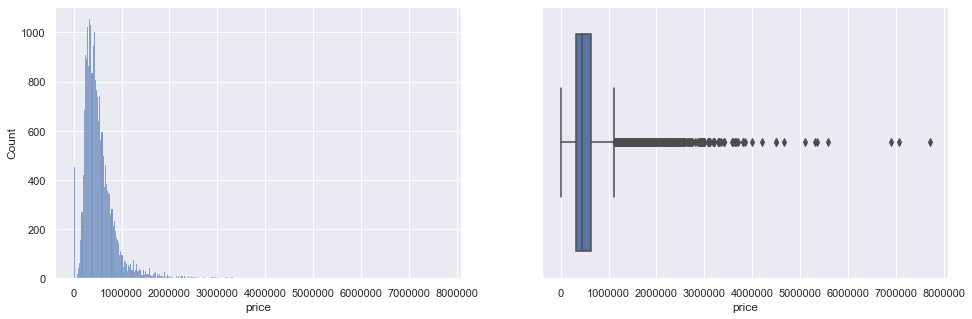

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [13]:
#Making the 'price' benchmark between $100000 to $900000
df.drop(df[df['price'] > 700000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

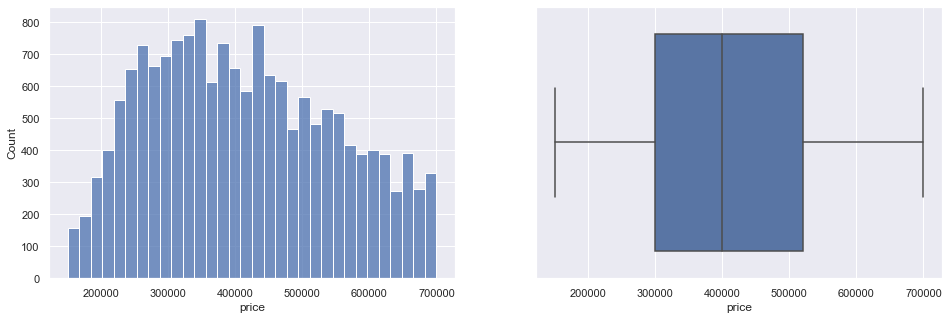

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

In [15]:
#checking the rows left
df.shape

(16745, 27)

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     8399
4     4633
2     2464
5      900
1      170
6      148
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    8399
4    4633
2    2464
5     900
1     170
6     148
Name: bedrooms, dtype: int64

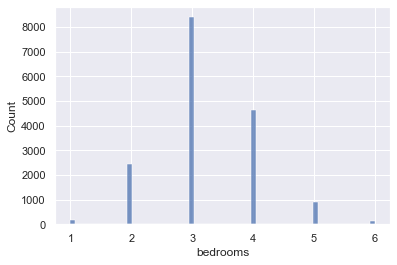

In [19]:
sns.histplot(data = df, x='bedrooms');

In [20]:
df.shape

(16714, 27)

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4101
1.00    3501
1.75    2703
2.00    1682
2.25    1654
1.50    1294
2.75     723
3.00     448
3.50     252
3.25     212
0.75      62
3.75      25
4.00      19
4.50      16
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

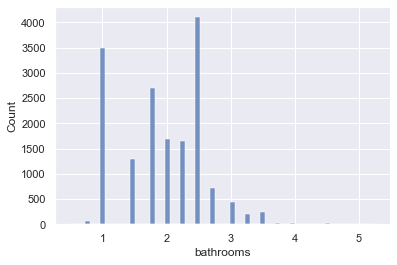

In [22]:
sns.histplot(data=df, x = 'bathrooms');

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

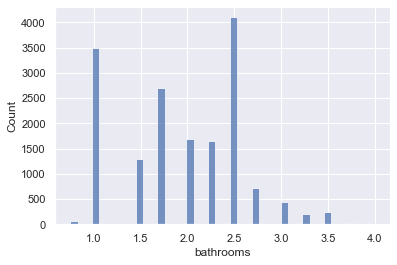

In [24]:
sns.histplot(data=df, x = 'bathrooms');

In [25]:
df.shape

(16683, 27)

### sqft_living

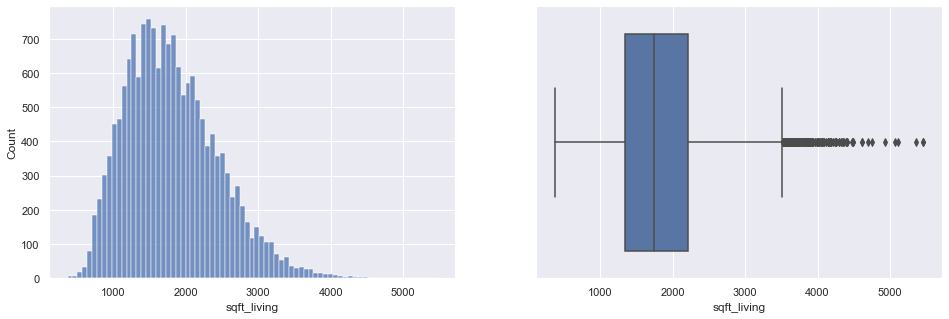

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

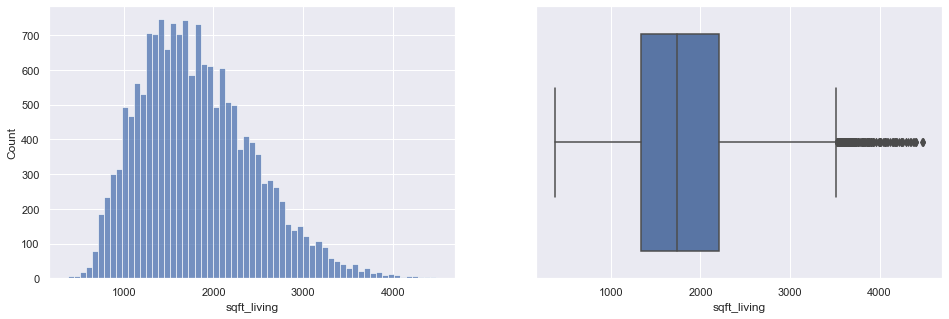

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [29]:
df.shape

(16673, 27)

### sqft_lot

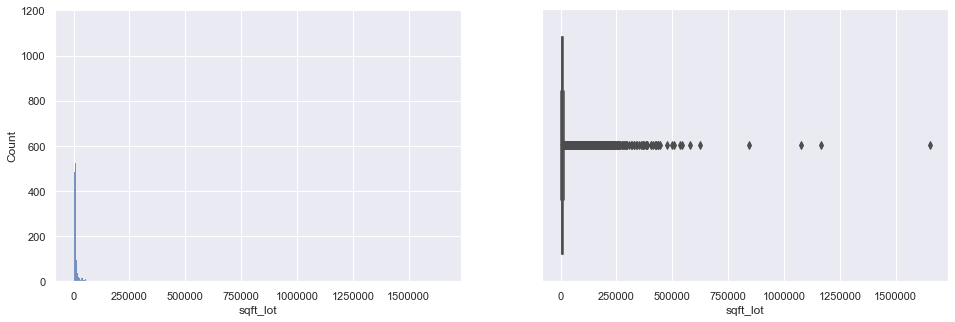

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)

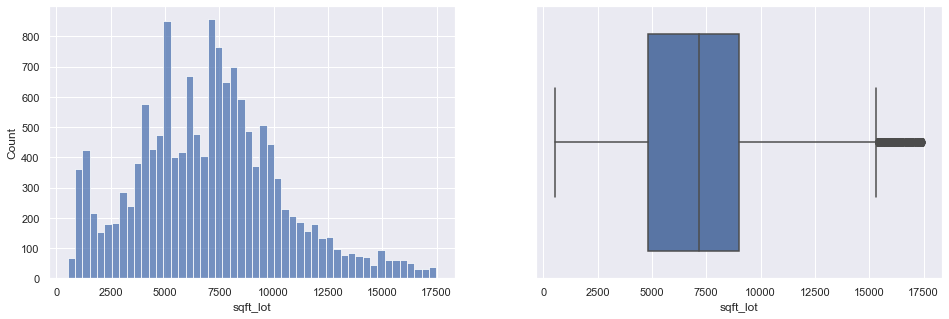

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [33]:
df.shape

(14990, 27)

### sqft_basement

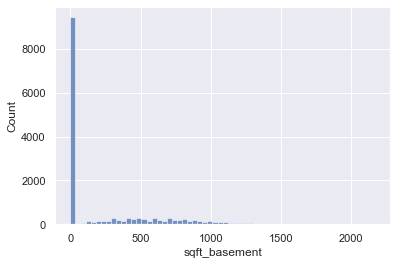

In [34]:
sns.histplot(data=df, x='sqft_basement');

In [35]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

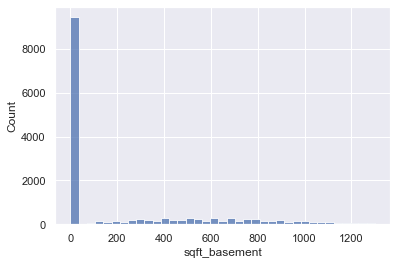

In [36]:
sns.histplot(data = df, x='sqft_basement');

#### is_basement

In [37]:
df['has_basement'].describe()

count    14838.000000
mean         0.363796
std          0.481107
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

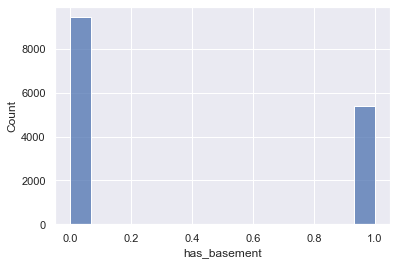

In [38]:
sns.histplot(data = df, x='has_basement');

In [39]:
df.shape

(14838, 27)

### floors

In [40]:
df['floors'].value_counts()

1.0    8122
2.0    4924
1.5    1246
3.0     482
2.5      58
3.5       6
Name: floors, dtype: int64

In [41]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [42]:
df['floors'].value_counts()

1.0    8122
2.0    4924
1.5    1246
3.0     482
2.5      58
Name: floors, dtype: int64

### grade and condition

In [43]:
df['grade'].value_counts()

7     7673
8     4218
6     1733
9      926
5      150
10     115
4       13
11       3
3        1
Name: grade, dtype: int64

In [44]:
df['condition'].value_counts()

3    9751
4    3872
5    1084
2     111
1      14
Name: condition, dtype: int64

### sqft_lot15

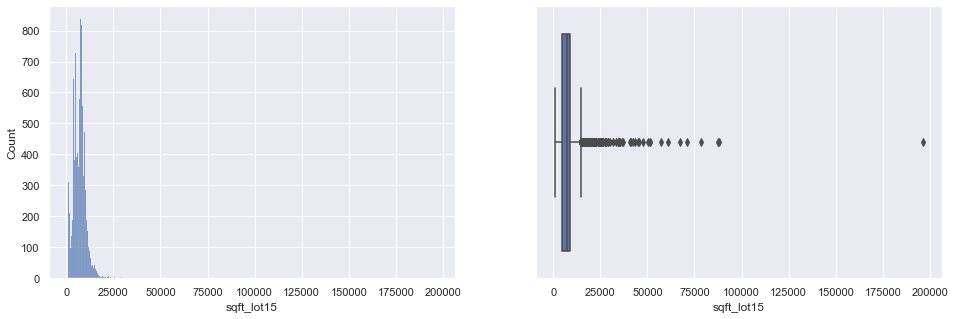

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [46]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

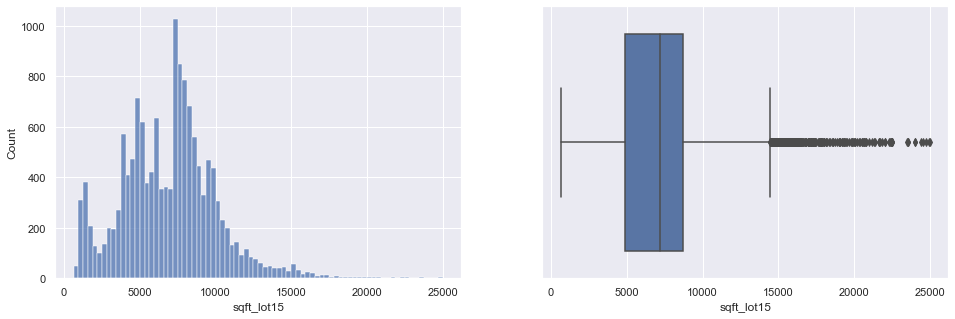

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [48]:
df.shape

(14789, 27)

### sqft_living15

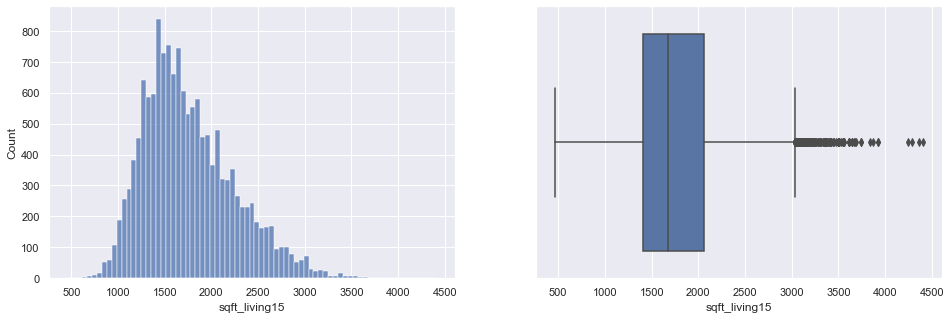

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

### date

In [50]:
df['year_sold'].value_counts()

2014    9970
2015    4819
Name: year_sold, dtype: int64

> deleting year_sold for not having much of a recording

In [51]:
df.drop('year_sold', axis=1, inplace=True)

### zipcode

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


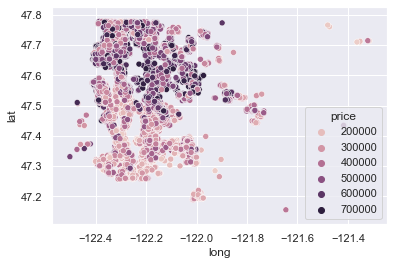

In [52]:
sns.scatterplot(df.long, df.lat, hue=df.price);

In [53]:
frequency = df.groupby('zipcode')['price'].count()
frequency

zipcode
98001    280
98002    178
98003    250
98004     27
98005     54
        ... 
98177    172
98178    226
98188    115
98198    223
98199    161
Name: price, Length: 69, dtype: int64

In [54]:
mean = df.groupby('zipcode').mean()['price']
mean

zipcode
98001    271986.396429
98002    238721.758427
98003    283515.832000
98004    632081.481481
98005    589203.166667
             ...      
98177    482602.877907
98178    289457.707965
98188    280939.695652
98198    279732.452915
98199    532290.099379
Name: price, Length: 69, dtype: float64

In [55]:
cluster = pd.concat([frequency, mean], axis=1)
cluster

,price,price
zipcode,,
98001,280,271986.396429
98002,178,238721.758427
98003,250,283515.832000
98004,27,632081.481481
98005,54,589203.166667
...,...,...
98177,172,482602.877907
98178,226,289457.707965
98188,115,280939.695652


In [56]:
cluster['zipcode'] = cluster.index

In [57]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,214.333333,418886.300224,98077.855072
std,128.304288,111068.442087,56.845062
min,19.000000,238721.758427,98001.000000
25%,117.000000,311124.153846,98029.000000
50%,217.000000,419949.202346,98070.000000
75%,280.000000,510011.021687,98118.000000
max,478.000000,632081.481481,98199.000000


In [58]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [59]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [60]:
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)
df.zipcode_type.value_counts() # viewing how our clusters look

cheap_low_volume         4974
cheap_high_volume        4498
expensive_low_volume     3698
expensive_high_volume    1619
Name: zipcode_type, dtype: int64

## Continuous and Categorical Features

In [61]:
# df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# df_cate = df[['condition', 'grade', 'zipcode']]

# pd.plotting.scatter_matrix(pd.concat([df_cont, df_cate], axis=1), figsize = [12,12])
# plt.show()

### Multi-collineary 

In [62]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.863163
"(sqft_living, sqft_above)",0.828491
"(sqft_living15, sqft_living)",0.709926


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [63]:
#creating seperate dataframe from the original to make changes
df_b = df

In [64]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

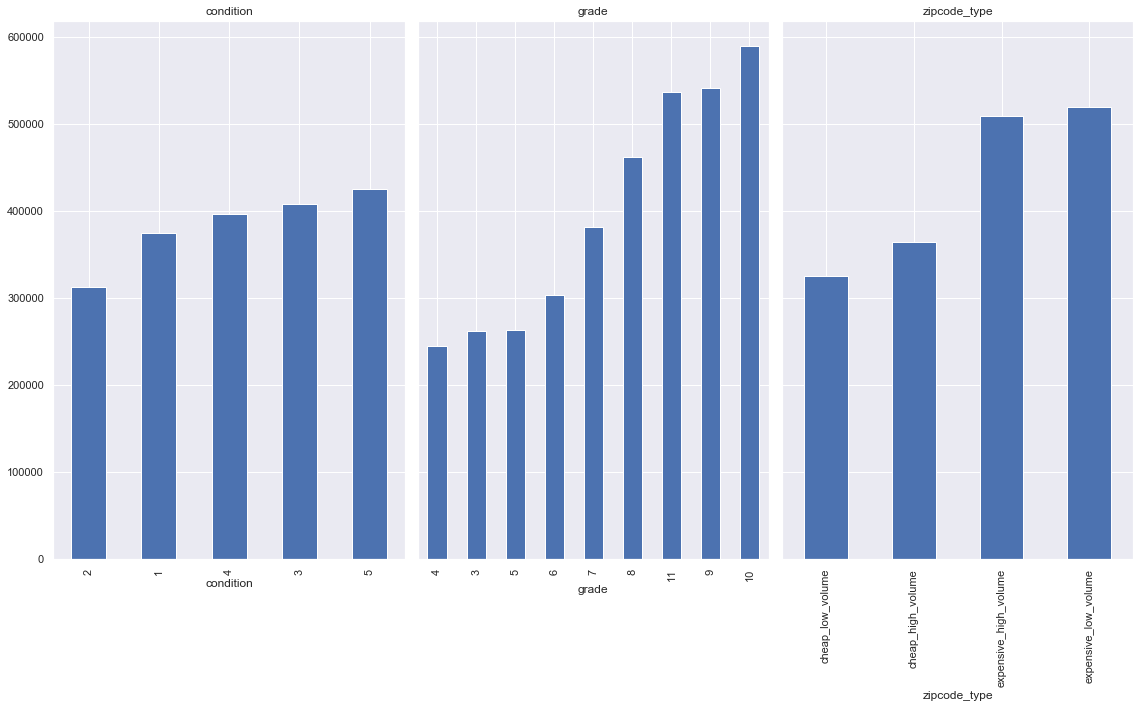

In [65]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [66]:
features = df[feats].astype('category')

In [67]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [68]:
feats_ohe = feats_ohe.astype(int)

In [69]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

> Adding the new features to the baseline data

In [70]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

In [71]:
df_b.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'sold_spring_time',
       'sold_summer_time', 'sold_fall_time', 'sold_winter_time',
       'has_renovated', 'has_basement', 'zipcode_type', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> dropping more unwanted columns from our baseline DataFrame

In [72]:
#dropping unwanted columns first
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)
df_b.drop('sqft_basement', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [73]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [74]:
df_b.drop('zipcode_type', axis = 1, inplace = True)

In [75]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,month_sold,sold_spring_time,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,5650,1.0,0,1955,10,0,...,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,1951,12,0,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,1933,2,1,...,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,5000,1.0,0,1965,12,0,...,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,8080,1.0,0,1987,2,1,...,0,0,0,1,0,0,0,0,0,1


In [76]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14789 entries, 0 to 21596
Data columns (total 30 columns):
price                                 14789 non-null int32
bedrooms                              14789 non-null int64
bathrooms                             14789 non-null float64
sqft_living                           14789 non-null int64
sqft_lot                              14789 non-null int64
floors                                14789 non-null float64
waterfront                            14789 non-null int32
yr_built                              14789 non-null int64
month_sold                            14789 non-null int64
sold_spring_time                      14789 non-null int32
sold_summer_time                      14789 non-null int32
sold_fall_time                        14789 non-null int32
sold_winter_time                      14789 non-null int32
has_renovated                         14789 non-null int32
has_basement                          14789 non-null int32
co

## First Model - Baseline


### Train-Test Split

In [77]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [78]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [79]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [80]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [81]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 80900.15
RMSE Test: 81297.43


###  model

In [82]:
from statsmodels.formula.api import ols

In [83]:
# Fitting the actual model
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     779.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:40:43   Log-Likelihood:            -1.5049e+05
No. Observations:               11831   AIC:                         3.010e+05
Df Residuals:                   11802   BIC:                         3.013e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.015e+06   9.15e+04     22.013      0.000    1.84e+06    2.19e+06
bedrooms                           -6027.1851   1203.915     -5.006      0.000   -8387.058   -3667.312
bathrooms                           1.342e+04   1988.968      6.747      0.000    9520.091    1.73e+04
sqft_living                           76.1824      2.232     34.139      0.000      71.808      80.557
sqft_lot                              -1.4391      0.284     -5.069      0.000      -1.996      -0.883
floors                              9673.9084   2179.843      4.438      0.000    5401.056    1.39e+04
waterfront                          2.583e+05    3.1e+04      8.336      0.000    1.98e+05    3.19e+05
yr_built                           -1189.9393     40.350    -29.490      0.000   -1269.033   -1110.846
month_sold                         -1887.7352    915.941     -2.061      0.039   -3683.131     -92.339
sold_spring_time                    4.989e+05   2.31e+04     21.615      0.000    4.54e+05    5.44e+05
sold_summer_time                    5.099e+05   2.29e+04     22.272      0.000    4.65e+05    5.55e+05
sold_fall_time                      5.009e+05    2.3e+04     21.750      0.000    4.56e+05    5.46e+05
sold_winter_time                    5.052e+05   2.34e+04     21.549      0.000    4.59e+05    5.51e+05
has_renovated                        923.6812   5184.899      0.178      0.859   -9239.576    1.11e+04
has_basement                        1.453e+04   1844.032      7.882      0.000    1.09e+04    1.81e+04
condition_2                          -2.4e+04   2.62e+04     -0.916      0.360   -7.54e+04    2.74e+04
condition_3                         7510.4367   2.47e+04      0.304      0.761   -4.09e+04     5.6e+04
condition_4                         8491.4201   2.47e+04      0.343      0.731      -4e+04     5.7e+04
condition_5                         3.433e+04   2.48e+04      1.383      0.167   -1.43e+04     8.3e+04
grade_4                             4276.3412    8.5e+04      0.050      0.960   -1.62e+05    1.71e+05
grade_5                            -5.219e+04   8.14e+04     -0.641      0.522   -2.12e+05    1.07e+05
grade_6                             -1.16e+04   8.11e+04     -0.143      0.886   -1.71e+05    1.47e+05
grade_7                             3.175e+04   8.11e+04      0.391      0.696   -1.27e+05    1.91e+05
grade_8                             7.959e+04   8.12e+04      0.981      0.327   -7.95e+04    2.39e+05
grade_9                             1.407e+05   8.13e+04      1.731      0.083   -1.86e+04       3e+05
grade_10                            1.505e+05   8.17e+04      1.842      0.065   -9618.286    3.11e+05
grade_11                            1.039e+05   9.94e+04      1.045      0.296    -9.1e+04    2.

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [84]:
import statsmodels.api as sm

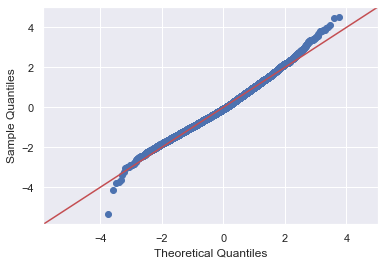

In [85]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

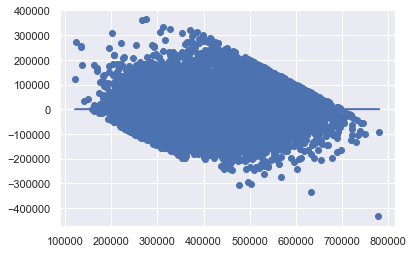

In [86]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [87]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 1.7713206376353405),
 ('bathrooms', 3.0131648253957812),
 ('sqft_living', 3.156486006694818),
 ('sqft_lot', 1.599385503869232),
 ('floors', 2.515338086507053),
 ('waterfront', 1.0163861614498655),
 ('yr_built', 2.5102849369204647),
 ('month_sold', 14.908540949283607),
 ('sold_spring_time', 5121.432003120915),
 ('sold_summer_time', 8196.125855895178),
 ('sold_fall_time', 7287.120527231428),
 ('sold_winter_time', 5940.946052671976),
 ('has_renovated', 1.07700087702154),
 ('has_basement', 1.4078792771688575),
 ('condition_2', 8.801034350572074),
 ('condition_3', 241.64158444877907),
 ('condition_4', 206.8884238245463),
 ('condition_5', 73.38008198456228),
 ('grade_4', 14.008823435587066),
 ('grade_5', 148.77744772718526),
 ('grade_6', 1530.1287449503616),
 ('grade_7', 3703.1764513550256),
 ('grade_8', 3021.6052058059586),
 ('grade_9', 870.5520478806147),
 ('grade_10', 115.58252451980832),
 ('grade_11', 4.014876129399204),
 ('zipcode_type_cheap_low_volume', 1.4182705087175795

In [89]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

29 15


In [90]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

In [91]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [92]:
dftrain.drop('condition_2', axis = 1, inplace = True)

In [93]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11831 entries, 13460 to 5289
Data columns (total 14 columns):
bedrooms                              11831 non-null int64
bathrooms                             11831 non-null float64
sqft_living                           11831 non-null int64
sqft_lot                              11831 non-null int64
floors                                11831 non-null float64
waterfront                            11831 non-null int32
yr_built                              11831 non-null int64
has_renovated                         11831 non-null int32
has_basement                          11831 non-null int32
grade_11                              11831 non-null int32
zipcode_type_cheap_low_volume         11831 non-null int32
zipcode_type_expensive_high_volume    11831 non-null int32
zipcode_type_expensive_low_volume     11831 non-null int32
price                                 11831 non-null int32
dtypes: float64(2), int32(8), int64(4)
memory usage: 1016.

### Train-Test Split

In [94]:
y = dftrain[['price']]
X = dftrain.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [95]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [96]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [97]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85846.5
RMSE Test: 86320.58


### model

In [98]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:40:46   Log-Likelihood:            -1.5120e+05
No. Observations:               11831   AIC:                         3.024e+05
Df Residuals:                   11817   BIC:                         3.025e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.811e+06   7.51e+04     24.117      0.000    1.66e+06    1.96e+06
bedrooms                           -1.099e+04   1256.106     -8.749      0.000   -1.35e+04   -8527.577
bathrooms                           1.748e+04   2086.562      8.378      0.000    1.34e+04    2.16e+04
sqft_living                          107.8847      2.159     49.976      0.000     103.653     112.116
sqft_lot                              -1.0339      0.299     -3.457      0.001      -1.620      -0.448
floors                              1.678e+04   2279.625      7.362      0.000    1.23e+04    2.13e+04
waterfront                          2.421e+05   3.26e+04      7.423      0.000    1.78e+05    3.06e+05
yr_built                            -840.6629     39.042    -21.532      0.000    -917.192    -764.134
has_renovated                        520.7751   5457.840      0.095      0.924   -1.02e+04    1.12e+04
has_basement                        1.202e+04   1936.319      6.209      0.000    8226.918    1.58e+04
grade_11                            -1.56e+04   6.09e+04     -0.256      0.798   -1.35e+05    1.04e+05
zipcode_type_cheap_low_volume      -3.476e+04   1979.886    -17.558      0.000   -3.86e+04   -3.09e+04
zipcode_type_expensive_high_volume  1.474e+05   2954.755     49.874      0.000    1.42e+05    1.53e+05
zipcode_type_expensive_low_volume   1.457e+05   2195.821     66.340      0.000    1.41e+05     1.5e+05
==============================================================================
Omnibus:                      248.896   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.354
Skew:                           0.344   Prob(JB):                     5.34e-59
Kurtosis:                       3.265   Cond. No.                     7.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

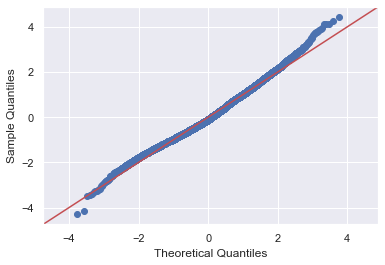

In [99]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

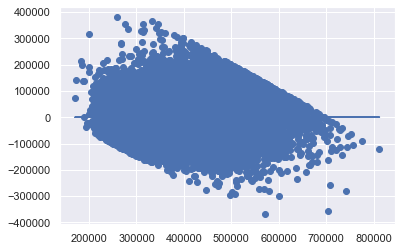

In [100]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))]);

## Third Model - P_Values

### finding and fixing high p_values

In [101]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [102]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated', 'grade_11']


In [103]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [104]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [105]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [106]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [107]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 85853.18
RMSE Test: 86267.39


### model

In [108]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:40:47   Log-Likelihood:            -1.5120e+05
No. Observations:               11831   AIC:                         3.024e+05
Df Residuals:                   11819   BIC:                         3.025e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.813e+06   7.32e+04     24.774      0.000    1.67e+06    1.96e+06
bedrooms                           -1.099e+04   1255.093     -8.757      0.000   -1.35e+04   -8530.992
bathrooms                            1.75e+04   2078.010      8.422      0.000    1.34e+04    2.16e+04
sqft_living                          107.8677      2.157     50.010      0.000     103.640     112.096
sqft_lot                              -1.0347      0.299     -3.460      0.001      -1.621      -0.449
floors                              1.679e+04   2277.265      7.373      0.000    1.23e+04    2.13e+04
waterfront                          2.422e+05   3.26e+04      7.433      0.000    1.78e+05    3.06e+05
yr_built                            -841.4517     38.058    -22.110      0.000    -916.051    -766.853
has_basement                        1.202e+04   1934.788      6.214      0.000    8230.358    1.58e+04
zipcode_type_cheap_low_volume      -3.476e+04   1979.529    -17.560      0.000   -3.86e+04   -3.09e+04
zipcode_type_expensive_high_volume  1.474e+05   2953.025     49.900      0.000    1.42e+05    1.53e+05
zipcode_type_expensive_low_volume   1.457e+05   2195.610     66.348      0.000    1.41e+05     1.5e+05
==============================================================================
Omnibus:                      248.987   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.456
Skew:                           0.344   Prob(JB):                     5.08e-59
Kurtosis:                       3.265   Cond. No.                     7.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ plot

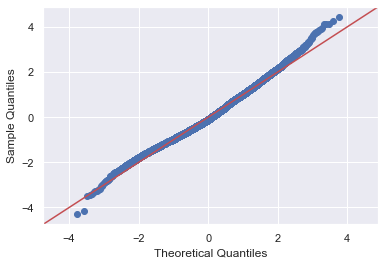

In [109]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

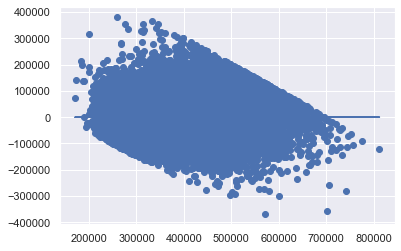

In [110]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## Fourth Model  - Transformation

### adding log values to 'continuous' columns

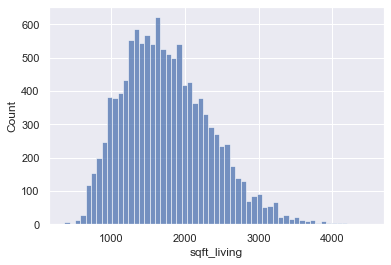

In [111]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = dftrain, x = 'sqft_living');

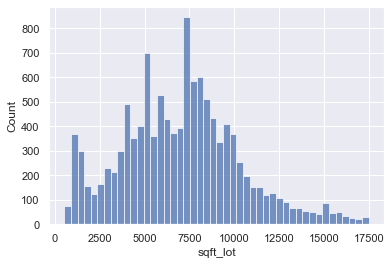

In [112]:
sns.histplot(data = dftrain, x = 'sqft_lot');

In [113]:
dfcont = dftrain[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    dftrain[col] = df_log[col]

In [114]:
dftrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,has_renovated,has_basement,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume,price,sqft_living_log,sqft_lot_log
13460,2,1.00,1000,3700,1.0,0,1929,0,1,0,0,0,0,257000,6.907755,8.216088
7880,5,2.00,2610,5009,1.0,0,1988,0,1,0,0,1,0,439000,7.867106,8.518992
37,4,2.00,2360,6000,2.0,0,1904,0,0,0,0,0,1,640000,7.766417,8.699515
15457,2,1.00,980,2130,1.0,0,1918,0,1,0,0,1,0,400000,6.887553,7.663877
3905,4,2.25,2270,9100,2.0,0,1978,0,0,0,0,0,0,420000,7.727535,9.116030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,3,1.75,2010,8072,1.0,0,1974,0,0,0,0,1,0,639500,7.605890,8.996157
17970,1,0.75,930,6600,1.0,0,1924,0,0,0,0,0,0,351000,6.835185,8.794825
1950,3,2.00,1370,9760,1.0,0,1979,0,1,0,0,0,0,232500,7.222566,9.186048
17077,2,1.00,860,7250,1.0,0,1949,0,0,0,0,0,0,305000,6.756932,8.888757


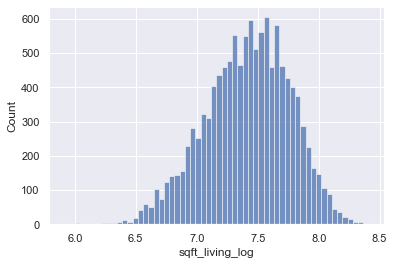

In [115]:
sns.histplot(data = dftrain, x = 'sqft_living_log');

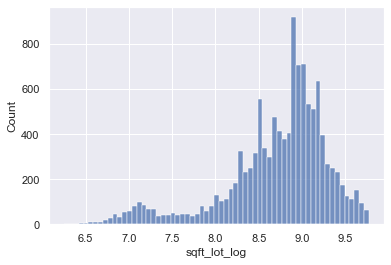

In [116]:
sns.histplot(data = dftrain, x = 'sqft_lot_log');

In [117]:
x_cols.remove('sqft_living')
# x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
# x_cols.append('sqft_lot_log')

### Train-Test Split

In [118]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [119]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [120]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [121]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86653.58
RMSE Test: 87269.38


### model

In [122]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1587.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:40:49   Log-Likelihood:            -1.5132e+05
No. Observations:               11831   AIC:                         3.027e+05
Df Residuals:                   11819   BIC:                         3.027e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            7.12e+05   7.73e+04      9.214      0.000     5.6e+05    8.63e+05
bedrooms                           -1.216e+04   1289.424     -9.429      0.000   -1.47e+04   -9630.614
bathrooms                           1.755e+04   2116.097      8.294      0.000    1.34e+04    2.17e+04
sqft_lot                              -1.0375      0.303     -3.420      0.001      -1.632      -0.443
floors                              1.672e+04   2303.616      7.256      0.000    1.22e+04    2.12e+04
waterfront                          2.424e+05   3.29e+04      7.368      0.000    1.78e+05    3.07e+05
yr_built                            -878.8506     38.437    -22.865      0.000    -954.194    -803.508
has_basement                        6659.5054   1982.883      3.358      0.001    2772.729    1.05e+04
zipcode_type_cheap_low_volume      -3.523e+04   1998.692    -17.624      0.000   -3.91e+04   -3.13e+04
zipcode_type_expensive_high_volume  1.459e+05   2981.595     48.939      0.000     1.4e+05    1.52e+05
zipcode_type_expensive_low_volume   1.448e+05   2217.438     65.305      0.000     1.4e+05    1.49e+05
sqft_living_log                     1.849e+05   3919.987     47.163      0.000    1.77e+05    1.93e+05
==============================================================================
Omnibus:                      250.021   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.185
Skew:                           0.353   Prob(JB):                     9.58e-59
Kurtosis:                       3.210   Cond. No.                     7.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

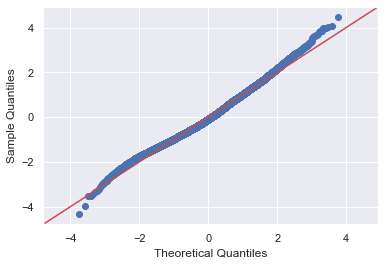

In [125]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

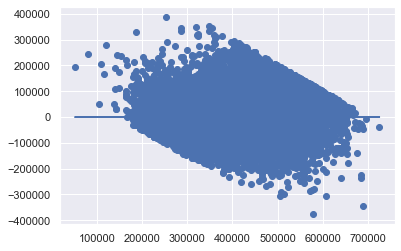

In [126]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## TEST (will delete later)

### creating interactions

In [129]:
dftrain['bed_bath_interaction'] = dftrain['bedrooms'] * dftrain['bathrooms']

In [132]:
df.drop('bedrooms', axis=1, inplace=True)
df.drop('bathrooms', axis=1, inplace=True)

In [133]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')

x_cols.append('bed_bath_interaction')

In [134]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1713.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:36:16   Log-Likelihood:            -1.5138e+05
No. Observations:               11831   AIC:                         3.028e+05
Df Residuals:                   11820   BIC:                         3.029e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            4.88e+05   7.28e+04      6.705      0.000    3.45e+05    6.31e+05
sqft_lot                              -1.3269      0.304     -4.364      0.000      -1.923      -0.731
floors                              2.098e+04   2268.592      9.250      0.000    1.65e+04    2.54e+04
waterfront                          2.428e+05   3.31e+04      7.339      0.000    1.78e+05    3.08e+05
yr_built                            -745.3228     36.142    -20.622      0.000    -816.166    -674.479
has_basement                        9552.3539   1969.508      4.850      0.000    5691.793    1.34e+04
zipcode_type_cheap_low_volume      -3.495e+04   2010.054    -17.386      0.000   -3.89e+04    -3.1e+04
zipcode_type_expensive_high_volume   1.48e+05   2994.417     49.437      0.000    1.42e+05    1.54e+05
zipcode_type_expensive_low_volume   1.475e+05   2220.842     66.418      0.000    1.43e+05    1.52e+05
sqft_living_log                     1.774e+05   3819.060     46.453      0.000     1.7e+05    1.85e+05
bed_bath_interaction                 777.9034    407.793      1.908      0.056     -21.438    1577.245
==============================================================================
Omnibus:                      272.365   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.204
Skew:                           0.371   Prob(JB):                     3.54e-64
Kurtosis:                       3.206   Cond. No.                     7.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

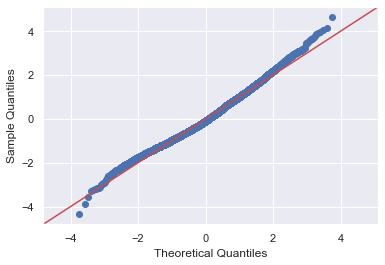

In [135]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### logging more

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built', ax=ax[1]);

In [ ]:
cont = ['yr_built']

In [ ]:
dftrain['yr_built_log'] = np.log(dftrain['yr_built'])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built_log', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built_log', ax=ax[1]);

In [ ]:
x_cols.remove('yr_built')
x_cols.append('yr_built_log')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### ohe ideas

In [ ]:
dftrain

In [ ]:
cate = ['bedrooms', 'bathrooms', 'floors']

features = df[cate].astype('category')
feats_ohe = pd.get_dummies(features, drop_first = True)
feats_ohe = feats_ohe.astype(int)

feats_ohe.columns = [c.replace('.', '_') for c in feats_ohe.columns]

In [ ]:
feats_ohe.info()

In [ ]:
df_test = pd.concat([dftrain, feats_ohe], axis=1)

In [ ]:
df_test = df_test.dropna() 

In [ ]:
df_test.drop('bedrooms', axis=1, inplace=True)
df_test.drop('bathrooms', axis=1, inplace=True)
df_test.drop('floors', axis=1, inplace=True)

In [ ]:
x_cols.extend(list(feats_ohe.columns))

In [ ]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')
x_cols.remove('floors')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = df_test).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> might keep floors as ohe and normalize bedrooms and bathrooms